In [19]:
# Perceptron: NN mechine learning algorithm

import numpy as np

class Perceptron(object):
    """Perceptron classifier
    
    Parameters
    ----------
    eta: float
        Learning rate(between 0.0 and 1.0).
    n_iter: int
        Learning cycles.
    random_state: int
        Random generator seed for random weight.
       
    Attributes   
    ----------
    w_: 1d-array
        Weights for fitting.
    errors_: list
        Number of missclassifications(updated).
        
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        ----------
        X: array-like vector, shape = [n_examples, n_features]
            Training vectors, also called input.
        y: array-like vector, shape = [n_examples]
            Target values.
        
        Returns
        -------
        self: Perceptron object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for input_data, target_data in zip(X, y):
                update_w = self.eta * (target_data - self.predict(input_data))
                self.w_[1:] += update_w * input_data
                self.w_[0] += update_w
                errors += int(update_w != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [20]:
np.where?
np.random.RandomState?

Init signature: np.random.RandomState(self, /, *args, **kwargs)
Docstring:     
RandomState(seed=None)

Container for the slow Mersenne Twister pseudo-random number generator.
Consider using a different BitGenerator with the Generator container
instead.

`RandomState` and `Generator` expose a number of methods for generating
random numbers drawn from a variety of probability distributions. In
addition to the distribution-specific arguments, each method takes a
keyword argument `size` that defaults to ``None``. If `size` is ``None``,
then a single value is generated and returned. If `size` is an integer,
then a 1-D array filled with generated values is returned. If `size` is a
tuple, then an array with that shape is filled and returned.

**Compatibility Guarantee**

A fixed bit generator using a fixed seed and a fixed series of calls to
'RandomState' methods using the same parameters will always produce the
same results up to roundoff error except when the values were incorrect.
`Random

In [21]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
print('URL: ', s)

URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [22]:
df = pd.read_csv(s, header=None, encoding='utf-8')  # read and justify the dataset
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


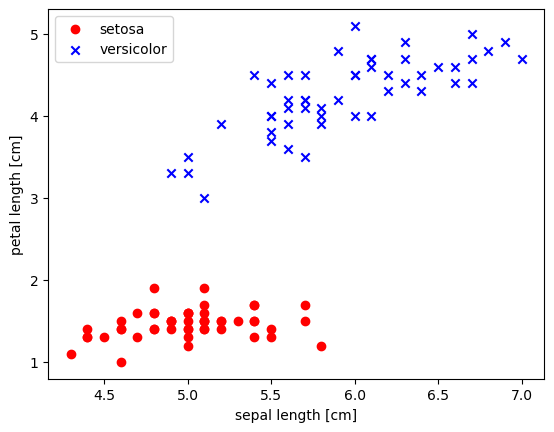

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values             # extract label data at the last column of the iris dataframe
y = np.where(y == 'Iris-setosa', -1, 1)  # set setosa to -1 while versicolor to 1

# select sepal length and petal length
X = df.iloc[0:100, [0, 2]].values        # extract two types of values we need as input for prediction

# plot data
plt.scatter(X[:50, 0], X[:50, 1], 
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], 
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

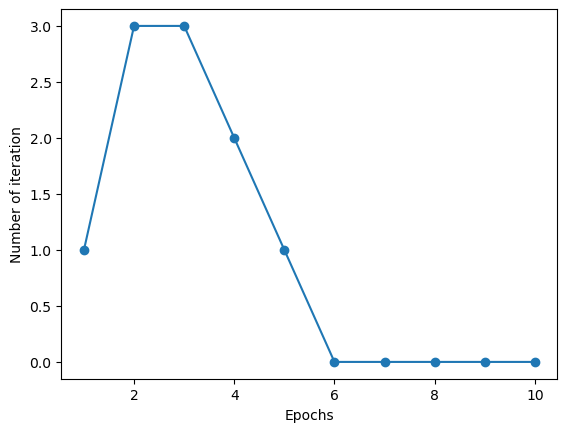

In [24]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of iteration')
plt.show()

In [25]:
# visualize the machine learning result
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolutions=0.02):
    """Visualize decision regions usinng matplotlib colormap
    
    Parameters
    ----------
    X: array-like vector, shape = [n_examples, n_features]
        Training vectors, also called input.
    y: array-like vector, shape = [n_examples]
        Target values.
    classifier: python object, mainly class
        binary machine learning classifier
    resolutions: float
        visualization map resolutions

    """

    # marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap = ListedColormap(colors[:len(np.unique(y))])

    # decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolutions),
                           np.arange(x2_min, x2_max, resolutions))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=colormap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # show class examples
    for idx, col in enumerate(np.unique(y)):
        plt.scatter(x=X[y == col, 0],
                    y=X[y == col, 1],
                    alpha=0.8,
                    c=colors[idx],
                    label=col,
                    edgecolors='black')

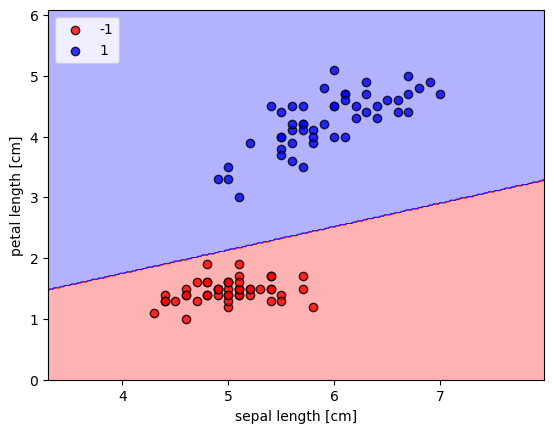

In [26]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [27]:
# Adaline, another NN mechine learning algorithm inspired from Perceptron

class AdalineGD(object):
    """Adaptive Linear Neuron classifier.
    
    Parameters
    ----------
    eta: float
        Learning rate(between 0.0 and 1.0).
    n_iter: int
        Passes over the trainning dataset.
    random_state: int
        Random number generator seed for random weight initialization.

    Attributes
    ----------
    w_: 1d-array
        Weights

    cost_: list
        Sum-of-squares cost function(SSE) value in each epoch.
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X: array-like, shape = [n_examples, n_features]
            Training data
        y: array-like, shape = [n_examples]
            Predicted value or label

        Returns
        -------
        self: object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        # Adaline learning rule: update weight through SSE
        for i in range(self.n_iter):
            errors = (y - self.activation(self.net_input(X)))
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Calculate linear activation"""
        return X
    
    def predict(self, X):
        """Return classed label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [28]:
a = np.array([[1, 2], [3, 4]])
print(a.T)
# print(a.ravel())

[[1 3]
 [2 4]]


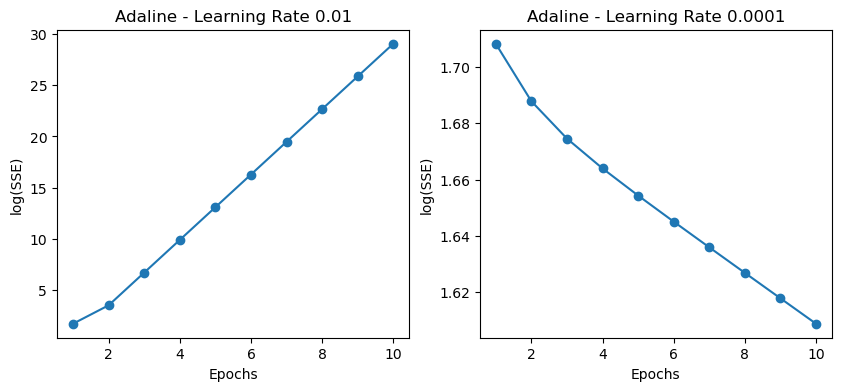

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada_result1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada_result1.cost_) + 1),
           np.log10(ada_result1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title('Adaline - Learning Rate 0.01')

ada_result2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada_result2.cost_) + 1),
           np.log10(ada_result2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(SSE)')
ax[1].set_title('Adaline - Learning Rate 0.0001')

plt.show()

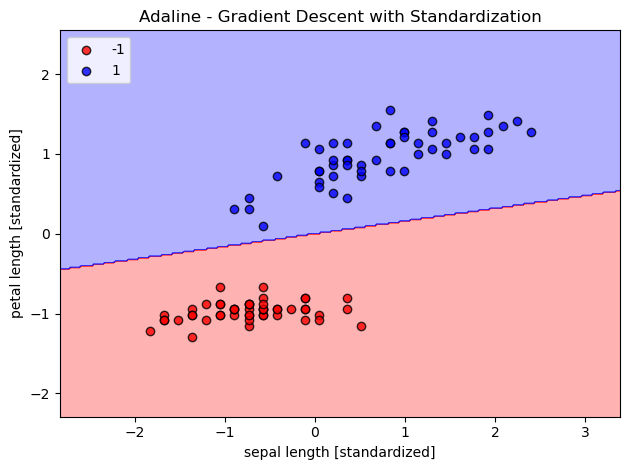

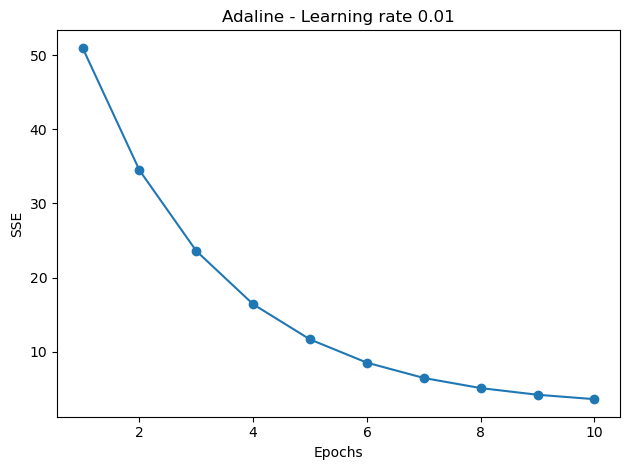

In [30]:
# standardization
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# train standardized data
ada_std = AdalineGD(n_iter=10, eta=0.01)
ada_std.fit(X_std, y)

# plot result
plot_decision_regions(X_std, y, classifier=ada_std)
plt.title('Adaline - Gradient Descent with Standardization')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# plot errors convergence
plt.plot(range(1, len(ada_std.cost_) + 1),
         ada_std.cost_, marker='o')
plt.title('Adaline - Learning rate 0.01')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.tight_layout()
plt.show()

In [31]:
# Stochastic Gradient Descent (SGD)
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier
    
    Parameters
    ----------
    eta: float
        Learning rate(between 0.0 and 1.0)
    n_iter: int
        iterations for training data
    shuffle: bool
        Shuffles training data every epoch if Ture to prevent
    random_state: int
        Random number generator seed for random weight initialization

    Attributes
    ----------
    w_: 1d-array
        Weights for fitting
    cost_: list
        Sum-of-squares cost function value averaged overall
    
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False

    def fit(self, X, y):
        """Fit training data
        
        Parameters
        ----------
        X: array-like, shape = [n_examples, n_features]
            Traning data vector
        y: array-like, shape = [n_examples]
            prediction result, target values

        Returns
        -------
        self: object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for input, target in zip(X, y):
                cost.append(self._update_weights(input, target))
            avg_cost = np.sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:                    
            for input, target in zip(X, y):
                self._update_weights(input, target)   # update weight when new data are more than 1 let
        else:
            self._update_weights(X, y)                # update weight when new data only has 1 let
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))   # generate a random series
        return X[r], y[r]                   # index data by the random series(r)

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, input, target):
        """Apply Adaline learning rule to update weights"""
        output = self.activation(self.net_input(input))
        error = (target - output)
        self.w_[1:] += self.eta * input.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

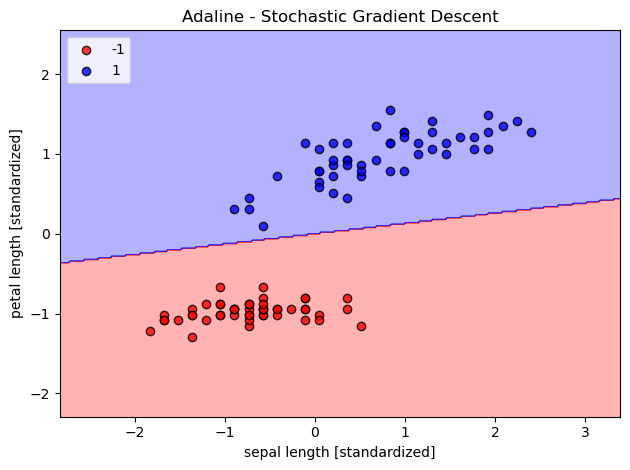

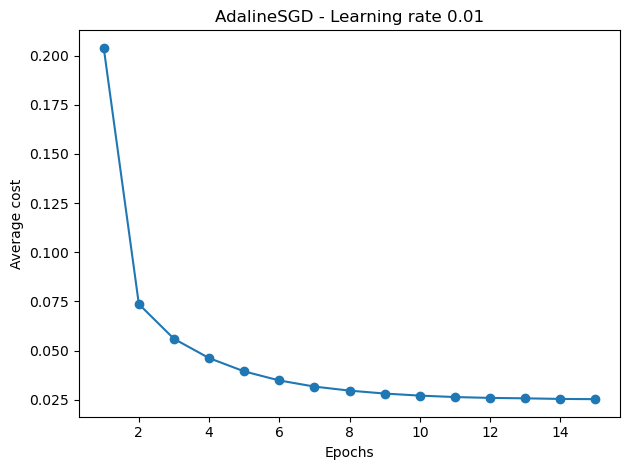

In [32]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), 
         ada_sgd.cost_, 
         marker='o')
plt.title('AdalineSGD - Learning rate 0.01')
plt.xlabel('Epochs')
plt.ylabel('Average cost')
plt.tight_layout()
plt.show()